## 一、MNIST手写数字数据集

In [1]:
# 用Scikit-Learn获得数据集
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original') # 下载mnist-original数据文件到scikit_learn_data/mldata目录下，要等待一段时间

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

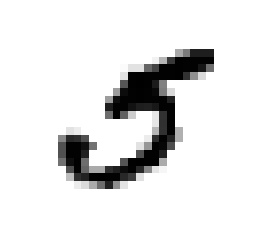

In [5]:
# 选择数据集的一个数字样本作图
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, # cmap表示绘图时的样式
          interpolation="nearest") # interpolation代表的是插值运算，'nearest'只是选取了其中的一种插值方式
plt.axis("off") # 去掉坐标轴方框
plt.show()

In [6]:
y[36000]

5.0

In [7]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
# 打乱训练集，这可以保证所有交叉验证子集都将相似的
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 二、训练一个二元分类器

In [9]:
y_train_5 = (y_train == 5) #返回0和1代表False和True
y_test_5 = (y_train == 5)

In [10]:
# 训练随机梯度下降分类器
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit]) # 检测数字5的图片

array([False])

## 三、性能评估

**3.1 用交叉验证测量精度**

In [12]:
# 实施交叉验证
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # 复制之前训练出来的分类器
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96685


C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9561


C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96535


In [13]:
# 用K折交叉验证评估SGDClassifier模型
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\l

array([0.96685, 0.9561 , 0.96535])

In [14]:
# 预测都为False,即都判断为不是5
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [15]:
never_5_clf = Never5Classifier()

In [16]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") # 意味着瞎猜全部不是5，都有90%的正确率

array([0.9141 , 0.9083 , 0.90655])

**3.2 混淆矩阵**

In [17]:
# 执行K折交叉验证，返回预测值
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\l

In [18]:
# 获得混淆矩阵
from sklearn.metrics import confusion_matrix # 行对应真实情况：第一行为反例，第二行为正例
                                             # 列对应预测结果：第一列为反例，第二列为正例
confusion_matrix(y_train_5, y_train_pred)    # 左上：真反例TN，右上：假真例FP，左下：假反例FN，右下：真正例TP

array([[53355,  1224],
       [ 1010,  4411]], dtype=int64)

In [19]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions) # 完美的分类器，只有对角线上是非零元素

array([[54579,     0],
       [    0,  5421]], dtype=int64)

**3.3 准确率与召回率（查准率与查全率）**

In [20]:
# 准确率P = TP / (TP + FP)  召回率R = TP / (TP + FN)
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7827861579414375

In [21]:
4612 / (4612 + 1876)

0.7108508014796547

In [22]:
recall_score(y_train_5, y_train_pred)

0.8136875115292381

In [23]:
4612 / (4612 + 809)

0.8507655414130234

In [24]:
# 计算F1分数：F1 = 2 / (1 / 准确率 + 1 / 召回率)，偏向于给两者等同的权重
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7979377713458756

**3.4 权衡准确率/召回率**

In [25]:
# 以SGD分类器为例，它根据决策函数计算出一个分数，如果这个分数大于阈值则判定为正例，反之，小于阈值则判定为反例
# Scikit-Learn可以通过调用分类器的decision_function()方法，返回决策分数
y_scores = sgd_clf.decision_function([some_digit])

In [26]:
y_scores

array([-5544.1211058])

In [27]:
threshold = 0 # 阈值
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [28]:
threshold = 250000 # 提高阈值
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [29]:
# 获取决策分数
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function") # 传入方法decision_function获得决策分数而不是预测值

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\l

In [30]:
# 用precision_recall_curve()函数计算对于所有可能阈值的准确率和召回率
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # 返回Numpy array

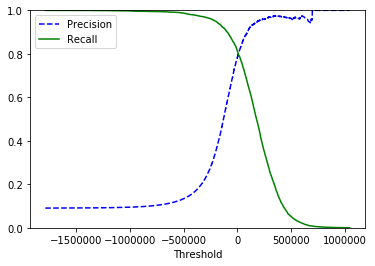

In [31]:
# 画出关于阈值的准确率和召回率的函数图
def plot_precision_recall_vs_threshold(precsions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") # thresholds取自升序后的y_scores第2个至最后一个元素，所以切片[:-1]
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [32]:
# 假定目标是90%正确率，将图放大，选择大于70000的阈值
y_train_pred_90 = (y_scores > 70000)

In [33]:
precision_score(y_train_5, y_train_pred_90) # 准确率

0.8818015546410608

In [34]:
recall_score(y_train_5, y_train_pred_90) # 召回率

0.7114923445858697

**3.5 ROC曲线**

In [35]:
# 用roc_curve()函数计算不同阈值下的TPR（真正例率）和FPR（假正例率）
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

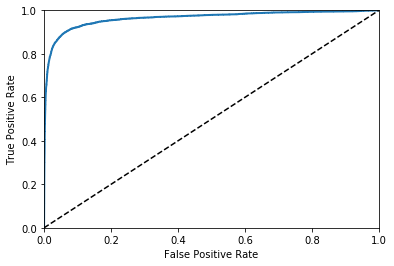

In [36]:
# 画ROC曲线
# 纵轴TPR——真正例率：TPR = 真正例TP / (真正例TP+假反例FN) = 1 - 假反例/真实正例数
# 横轴FPR——假正例率：FPR = 假正例FP / (真反例TN+假正例FP) = 1 - 真反例/真实反例数

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # k表示black黑
    plt.axis([0, 1, 0, 1]) # 限制轴[xmin, xmax, ymin, ymax]
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [37]:
# 计算AUC,为ROC曲线下的面积
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9642322630992871

In [38]:
# 训练一个随机森林分类器，并画出ROC曲线
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)                      # 此分类器不具有decision_function方法，有方法predict_proba，
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, # 返回数组，每行为一个样本，每列为一个类别，每个元素表示这
                                   method="predict_proba")                # 样本属于此类别的概率

In [39]:
y_scores_forest = y_probas_forest[:, 1] # 分数 = 正例的概率
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

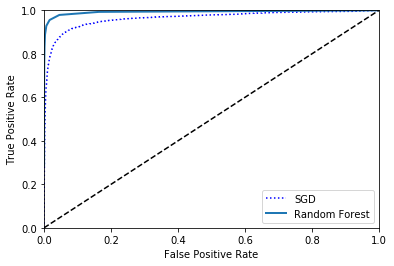

In [40]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") # 画ROC曲线
plt.legend(loc="lower right") # 现在下表示为lower，bottom会跳出警告
plt.show()

In [41]:
roc_auc_score(y_train_5, y_scores_forest) # AUC

0.9929740726823723

## 四、多分类

In [42]:
# Scikit-Learn自动检测出你尝试用一个二分类器应用在多分类任务上，并自动运行OvA（一对所有剩下的类）
# 用SGD分类器尝试
sgd_clf.fit(X_train, y_train) # 这里不再是y_train_5,而是y_train

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [43]:
sgd_clf.predict([some_digit])

array([5.])

In [44]:
# 看清上面例子的背后原理
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-225415.56723227, -461185.45999331, -370399.22050381,
        -263639.46679021, -424171.58866877,   -5544.1211058 ,
        -748053.90699876, -223477.81830489, -637230.22337435,
        -640554.84241907]])

In [45]:
np.argmax(some_digit_scores)

5

In [46]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [47]:
sgd_clf.classes_[5]

5.0

In [48]:
# 基于SGD分类器，用OvO(一对一)策略训练一个多分类器
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\l

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\l

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\l

array([5.])

In [49]:
len(ovo_clf.estimators_)

45

In [50]:
# 训练一个随机森林的多分类器
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [51]:
# 对于随机森林分类器，不必运行OvA或OvO，因为可以调用predict_proba()得到每个样本对于每个类别的分类概率
forest_clf.predict_proba([some_digit])

array([[0.2, 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [52]:
# 评估SGD分类器的精确度
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\l

array([0.84138172, 0.87314366, 0.84707706])

In [53]:
# 标准化数据，使得精确度进一步上升
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\l

array([0.91021796, 0.90929546, 0.90943642])

## 五、误差分析

In [54]:
# 观察混淆矩阵
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LeoWang\Anaconda3\l

array([[5725,    3,   18,   11,   13,   54,   45,    9,   42,    3],
       [   2, 6490,   42,   28,    6,   37,    7,   13,  105,   12],
       [  58,   35, 5316,  104,   96,   23,   97,   62,  152,   15],
       [  52,   38,  136, 5362,    3,  226,   31,   55,  130,   98],
       [  20,   29,   30,    7, 5418,    8,   51,   31,   71,  177],
       [  72,   43,   31,  197,   82, 4593,  111,   31,  165,   96],
       [  32,   21,   47,    2,   43,   94, 5624,    7,   48,    0],
       [  20,   20,   65,   30,   63,   10,    6, 5820,   15,  216],
       [  50,  152,   67,  182,   15,  163,   62,   26, 4996,  138],
       [  44,   34,   27,   87,  194,   33,    2,  214,   79, 5235]],
      dtype=int64)

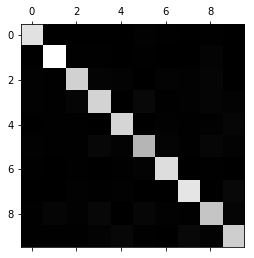

In [55]:
# 混淆矩阵的图像表示
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

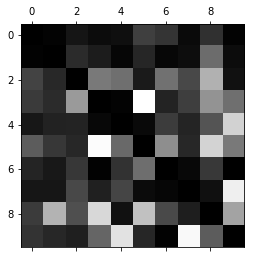

In [56]:
# 关注误差上的图片
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0) # 将对角线上元素换为0，代表错误率为0
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [57]:
# 输入样本画图(书上没有)
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    image_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1 # 前面len(instances)-1是因为如果不减1，能够整除的话会多一行
    row_images =[]
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0) # 去掉row_images最外层的[]
    plt.imshow(image, cmap=matplotlib.cm.binary, **options)
    plt.axis("off")

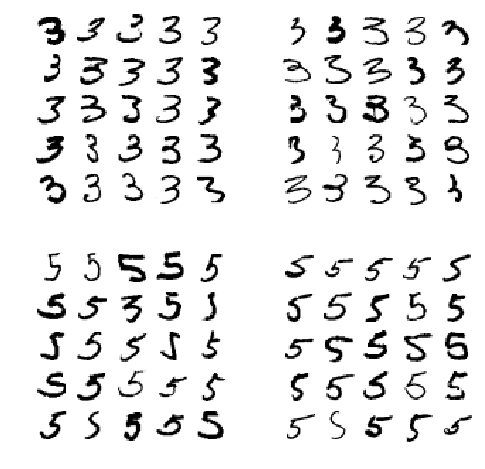

In [58]:
# 分析个体的错误
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## 六、多标签分类

In [59]:
# 仅为了演示，看这个例子：K近邻分类器
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
knn_clf.predict([some_digit]) # 预测

array([[False,  True]])

In [61]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3) # 运行时间较长

In [63]:
f1_score(y_train, y_train_knn_pred, average="macro") # 宏平均

0.9679544476579267

## 七、多输出分类

In [80]:
# 通过randint()函数给原数据加噪声，目标图像将是原始图像
import numpy.random as rnd
noise_train = rnd.randint(0, 100, (len(X_train), 784))
noise_test = rnd.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

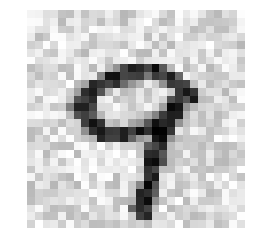

In [83]:
# 画出添加噪音后的图
some_digit = X_train_mod[30000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, # cmap表示绘图时的样式
          interpolation="nearest") # interpolation代表的是插值运算，'nearest'只是选取了其中的一种插值方式
plt.axis("off") # 去掉坐标轴方框
plt.show()

In [85]:
# 训练分类器，达到去噪功能
knn_clf.fit(X_train_mod, y_train_mod) # 目标y_train_mod = X_train，所以达到去噪功能
clean_digit = knn_clf.predict([X_test_mod[4000]])

In [88]:
def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
              interpolation="nearest")
    plt.axis("off")
    plt.show

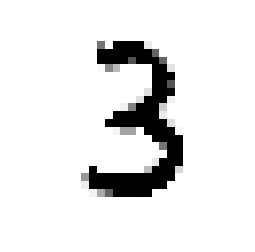

In [89]:
plot_digit(clean_digit)

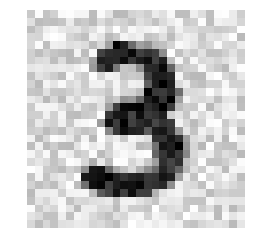

In [90]:
plot_digit(X_test_mod[4000])